<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/Exp_LinReg/COVID19Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import scipy.io as sio
f = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/covid/res_sq_flt4.mat')
inp = f['res_sq_flt']

#Load data
f2 = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/covid/label.mat')

out = f2['y']

In [3]:
input_data = inp
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (544, 484) float64
output_class :  (544, 1) uint8



In [4]:
input_data.shape

(544, 484)

In [5]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (109, 484) float64
Training data :  (435, 484) float64



In [6]:
model = Sequential()
model.add(Dense(1, input_dim=484, activation='sigmoid'))

In [7]:
loss='binary_crossentropy'
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 485       
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [8]:
#setting final parameters for the network and it begins to train
number_of_iterations = 30
batch_size = 50

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/30
9/9 [==============================] - 0s 17ms/step - loss: 0.7757 - accuracy: 0.5218 - val_loss: 0.7757 - val_accuracy: 0.5321
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.7273 - accuracy: 0.5563 - val_loss: 0.7404 - val_accuracy: 0.5596
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5885 - val_loss: 0.6939 - val_accuracy: 0.6147
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6092 - val_loss: 0.6844 - val_accuracy: 0.6330
Epoch 5/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6437 - val_loss: 0.6560 - val_accuracy: 0.6789
Epoch 6/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.6529 - val_loss: 0.6389 - val_accuracy: 0.6881
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.6759 - val_loss: 0.6333 - val_accuracy: 0.6697
Epoch 8/30
9/9 [=================

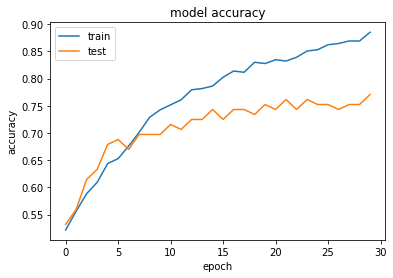

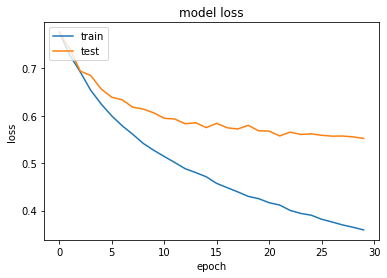

In [9]:
from google.colab import files
ac=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ac.show()
#ac.savefig('acc-1.png')
#files.download('acc-1.png')

# summarize history for loss
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('loss-1.png')
#files.download('loss-1.png')

In [11]:
sio.savemat('/content/drive/My Drive/Research/MMF_Reservoir/covid/network_res.mat', {'y':out, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train, 'acc':history.history['accuracy'], 'val_acc':history.history['val_accuracy'], 'loss':history.history['loss'], 'val_loss':history.history['val_loss']})